<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TOPICS-IN-SCIENTIFIC-COMPUTING" data-toc-modified-id="TOPICS-IN-SCIENTIFIC-COMPUTING-1">TOPICS IN SCIENTIFIC COMPUTING</a></span></li><li><span><a href="#Question-1.-Plotting-functions" data-toc-modified-id="Question-1.-Plotting-functions-2">Question 1. Plotting functions</a></span></li><li><span><a href="#Question-2.-Fixed-point-iteration:-transcendental-equations." data-toc-modified-id="Question-2.-Fixed-point-iteration:-transcendental-equations.-3">Question 2. Fixed point iteration: transcendental equations.</a></span></li><li><span><a href="#Question-3.-Lane-Emden-equation." data-toc-modified-id="Question-3.-Lane-Emden-equation.-4">Question 3. Lane-Emden equation.</a></span></li><li><span><a href="#Question-4.-Fixed-point-iteration:-matrix-multiplication." data-toc-modified-id="Question-4.-Fixed-point-iteration:-matrix-multiplication.-5">Question 4. Fixed point iteration: matrix multiplication.</a></span></li><li><span><a href="#Question-5.-Solving-differential-equations." data-toc-modified-id="Question-5.-Solving-differential-equations.-6">Question 5. Solving differential equations.</a></span></li><li><span><a href="#Question-6.-Numerical-integration." data-toc-modified-id="Question-6.-Numerical-integration.-7">Question 6. Numerical integration.</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8">References</a></span></li></ul></div>

#   TOPICS IN SCIENTIFIC COMPUTING
            # ASSIGNMENT 1
            
     Amaya Ruth Syed - student no. 190805496
            
            

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Question 1. Plotting functions

The first item of the assignment focuses on plotting functions. To do so, we import Python's plotting library Matplotlib, which we will call using the plt prefix.

(a) Produce a plot of the function

$$ h(x) = \left \{
  \begin{aligned}
    & \frac{1}{x} \sin x, && \text{if}\ x \neq 0 \\
    & 1, && \text{if} \ x = 0
  \end{aligned} \right.
$$

with $n = 100$ equally spaced points for $x \in [0; 2\pi]$

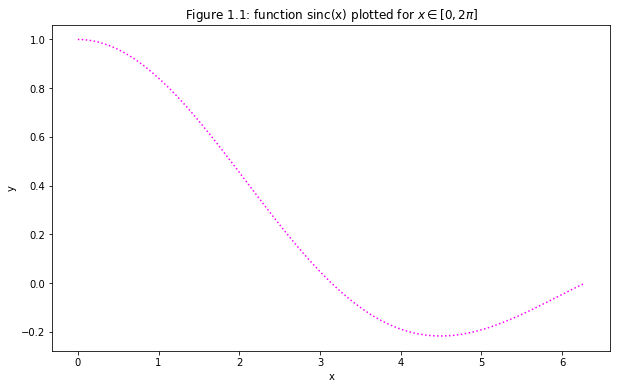

In [ ]:
# Creating an array x going from 0 to 2pi with a 100 equally spaced points.
x = np.linspace(start = 0, stop = 2*np.pi, num = 100)

#defining the function
def h(x):
    return np.sinc(x/np.pi)

# Plotting y
plt.figure(figsize=(10,6))
plt.plot(x, h(x), ":", color= "magenta")

plt.xlabel("x")
plt.ylabel("y")
plt.title(r'Figure 1.1: function sinc(x) plotted for $x \in [0, 2\pi]$')

plt.show()

(b) Produce a plot of the functions

\begin{equation*}
    f(y) = y (2 y^{2} - 5) \sqrt{y^{2} - 1} + 3 log(y + \sqrt{y^{2} - 1)} \\
    g(y) = y (2 y^{2} - 1) \sqrt{(y^{2} - 1)} - log(y + \sqrt{(y^{2} - 1)}
\end{equation*}

    
with $n = 200$ equally spaced points for $y \in [1, 2]$

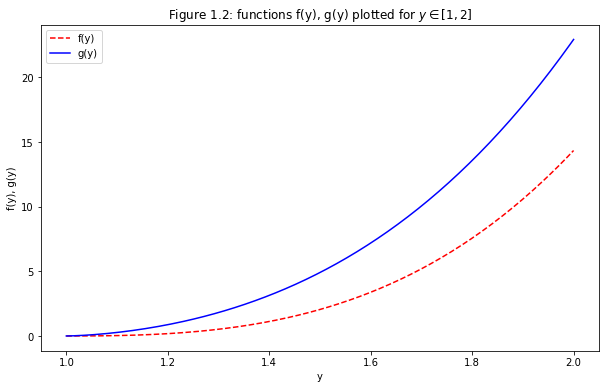

In [ ]:
# Creating an array y going from 1 to 2 with a 200 equally spaced points.
y = np.linspace(start = 1, stop = 2, num = 200)

# definition of the above functions
def f(y): 
    return y * (2* y**2 - 5) * np.sqrt(y**2 - 1) + 3 * np.log(y + np.sqrt(y**2 - 1))

def g(y):
    return y * (2* y**2 - 1) * np.sqrt(y**2 - 1) - np.log(y + np.sqrt(y**2 - 1))

# Plotting f(y), g(y)
plt.figure(figsize=(10,6))
plt.plot(y, f(y), "--", color="red", label= "f(y)")
plt.plot(y, g(y), color="blue", label="g(y)")

plt.xlabel("y")
plt.ylabel("f(y), g(y)")
plt.legend()
plt.title(r'Figure 1.2: functions f(y), g(y) plotted for $y \in [1, 2]$')

plt.show()    

(c) Produce a parametric log-log plot 

\begin{equation}
(t, s) = (g(y), f(y))
\end{equation}

with $n = 200$ equally spaced points for $y \in [1, 2]$ with $f(y)$ and $g(y)$ as defined in (b).

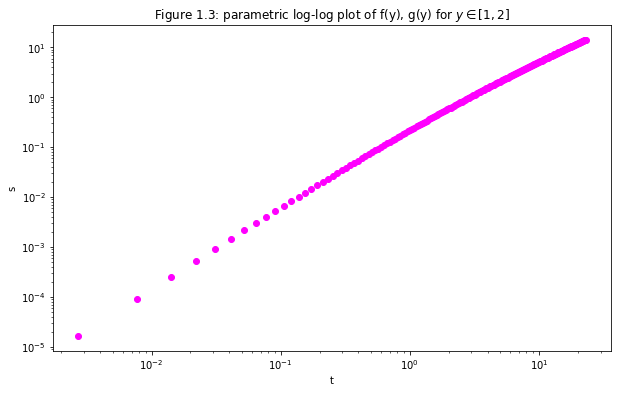

In [ ]:
# Log-log parametric plot of (t, s) = (g(y), f(y))
plt.figure(figsize=(10,6))
plt.loglog(g(y), f(y),'o', color="magenta") #loglog plot

plt.xlabel("t")
plt.ylabel("s")
plt.title(r'Figure 1.3: parametric log-log plot of f(y), g(y) for $y \in [1, 2]$')

plt.show()

(d) Produce a plot of the two functions

\begin{equation}
u(t) = cos(t) \\
v(t) = t
\end{equation}

with $n = 25$ equally spaced points for $t \in [0, 1]$

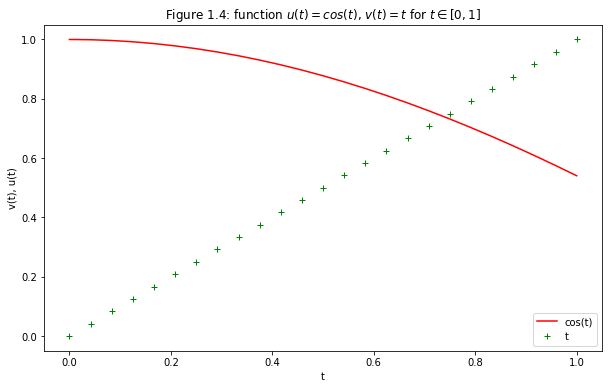

In [ ]:
# Creating an array t going from 0 to 1 with a 25 equally spaced points.
t = np.linspace(0, 1, 25)

#defining the functions u, v
u = np.cos(t)
v = t

#plotting
plt.figure(figsize=(10,6))
plt.plot(t, u, color="red", label="cos(t)")
plt.plot(t, v, "+", color="green", label="t")

plt.xlabel("t")
plt.ylabel("v(t), u(t)")
plt.title(r'Figure 1.4: function $u(t) = cos(t)$, $v(t) = t$ for $t \in [0,1]$')
plt.legend()

plt.show()

# Question 2. Fixed point iteration: transcendental equations.

As we can see from Figure 1.4 the equation

\begin{equation}
x = cos(x)
\end{equation}

clearly has at least one solution between $0$ and $1$, corresponding to the intersection of $y = x$ and $y = cos(x)$. This is equivalent to saying the function has at least one fixed point $c \in [0, 1]$, where the function $f(x)$ maps to itself, that is to say $f(c) = c$.

The difficulty resides in finding this point, as the equation is transcendental and there are no closed form algebraic methods for solving it. We must therefore turn to numerical methods to approximate a solution.

To do so, we can use the Fixed point iteration algorithm, which is a recursive root finding method which will converge to $c$ for equations of the form $f(x) = 0$, which we can rearrange as follows:

\begin{equation}
x = g(x)
\end{equation}

then finding $x = c$, such that $c = g(c)$, which is equivalent to $f(c) = 0$ [2, 3].

The fixed-point iteration method will converges if, in the neighborhood of the fixed point, the derivative of g(x) has an absolute value that is smaller than 1 (also called Lipschitz continuous) [3]:

\begin{equation}
\vert g'(x) \vert < 1 
\end{equation}

In this case, we know $eq. 4$ is Lipschitz continuous, hence we know the function will converge to its fixed point [CITE]. 

However, because of a desire for completeness, we will build a general iterative function, such that:

\begin{equation}
 x_{n+1} = cos(x_{n}) 
\end{equation}

which can accept any function as input (f), adding a safeguard for functions (or initial values) which might fail to converge. To avoid infinite loops, we will choose a maximum number of iterations (max_iter), hence leaving the loop if the function fails to converge in that time. As a convergence criterion we will use:

\begin{equation}
\vert x_{n+1 } - x_{n} \vert < \varepsilon
\end{equation}

In addition, to visualize the geometric interpretation of the fixed point iteration algorithm, we will build a graph which shows the convergence process (cf. Figure 2.1).



In [ ]:
# first we define the function fixed_point_iteration, whereby we keep assigning cos(x) to x 
# while the diff is larger than epsilon. We also keep the values calculated for each point to plot them and 
# we add a max no. of iterations in case the function fails to converge to a fixed point. 

def fixed_point_iteration(f, x, epsilon, max_iter, values= False):
    
    y = f(x)
    tol = epsilon
    i = 0
    if values: values = [[x, y]]
    
    while np.abs(x - y) > tol:
        if i < max_iter:
            x = f(x)
            i += 1
            y = f(x)
            if values: values.append([x, y])
        else:
            return "Function failed to converged to fixed point"
    if values:
        return y, values, i
        

In [ ]:
def f(x):
    return np.cos(x)

epsilon = 10**(-16)
max_iter = 100

# check if the function is converging correctly
#fixed_point_iteration(f, 1, epsilon, max_iter, values= True)

In [ ]:
y, values, i = fixed_point_iteration(f, 1, epsilon, max_iter, values= True)

print("The value of the fixed point for x = cos(x) is x =", y, 
      ".It took", i, "iterations to reach the fixed point")

The value of the fixed point for x = cos(x) is x = 0.7390851332151607 .It took 90 iterations to reach the fixed point


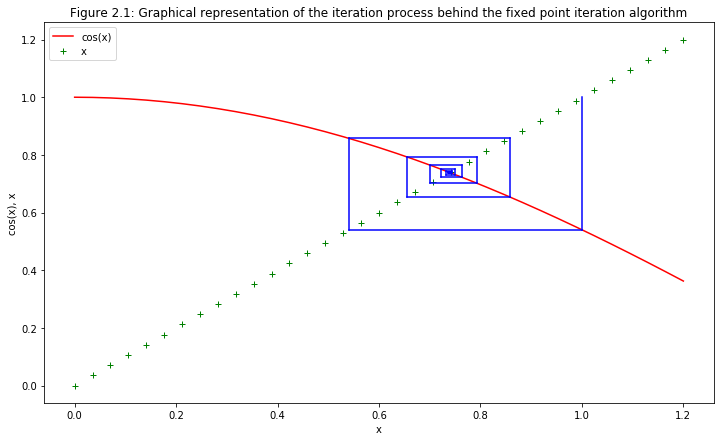

In [ ]:
x = np.linspace(0, 1.2, 35)

#plot function and identity
plt.figure(figsize=(12,7))
plt.plot(x, f(x), color="red", label="cos(x)")
plt.plot(x, x, "+", color="green", label="x")
plt.xlabel("x")
plt.ylabel("cos(x), x")
plt.title(r'Figure 2.1: Graphical representation of the iteration process behind the fixed point iteration algorithm')
plt.legend()

# plot lines
for x, y in values:
    plt.plot([x, x], [x, y], 'b')
    plt.plot([x, y], [y, y], 'b')

# show result
plt.show()

# Question 3. Lane-Emden equation.

The Lane-Emden, a 2nd order differential equation which describes the density profile of a gaseous star, was first published by Jonathan Homer Lane in 1870 [4]. It has an arbitrary index, known as the polytropic index, involved in one of its terms. Different values of the polytropic index describe different phenomena in theoretical physics and astrophysics, including various aspects of stellar structure [4]. The equation has an analytical solution for polytropic indexes $n= 0$, $1$, and $5$. For $n = 1$ and standard boundary conditions, the equation takes the form

\begin{equation} \left \{
    \begin{aligned}
    & h''(x) + \frac{2}{x}h'(x) + h(x) = 0 \\
    & h(0) = 1, \ h'(0) = 0
    \end{aligned} \right.
\end{equation}

and its analytic solution is

\begin{equation}
h(x) = \frac{1}{x}\sin(x)
\end{equation}

We can take advantage of the fact we know the analytical solution for $n = 1$, by reducing the 2nd order differential equation to a system of two first order differential equations and using a numerical method to approximate the solution, which we will then be able to compare to the exact solution.

(a) We will use Taylor expansions of $h(x)$, $h'(x)$ and $h''(x)$ around $x = 0$ to study the solution $h(x)$ in a neighborhood of $x = 0$.

\begin{equation} 
\begin{aligned}
& h(x) = h(0) + O(x) \\
& h'(x) = h'(0) + h''(0)x + O(x^{2}) \\
& h''(x) = h''(0) + O(x) \\
\end{aligned} 
\end{equation}
We choose these orders of approximation to get a degree 0 equation in $x$.

Reeplacing these expressions in the Lane-Emden equation, we obtain

\begin{equation}
h''(0) + \frac{2}{x}(h'(0) + h''(0)x) + h(0) = 0
\end{equation}

Which simplifies to

\begin{equation}
h''(0) + 2(0 + h''(0)) + 1 = 0 \\
3h''(0) + 1  = 0 
\end{equation}

So for $x \longmapsto 0$, we have

\begin{equation}
h''(0) = -\frac{1}{3}
\end{equation}


(b) To show that this 2nd order differential equation can be solved numerically, we will first transform it to a first order system by redefining variables.

\begin{equation*}
f(x) = h'(x) \\
f'(x) = h''(x)
\end{equation*}

Hence, the Lane-Emden equation can be rewritten as follows:

\begin{equation} \left \{
    \begin{aligned}
    & f'(x) + \frac{2}{x}f(x) + h(x) = 0 \\
    & h'(x) = f(x)
    \end{aligned} \right.
\end{equation}

Thereby reducing the problem to a first order system of differential equations.


(c) To solve the system above numerically we will employ a finite difference method. The objective is to transform a calculus problem into an algebra one by discretizing the continuous solution domain and replacing the exact derivatives in the differential equation by finite difference approximations. The solution domain is discretized by a one-dimensional set of discrete grid points. Then the finite difference solution of the ODE is obtained at these gridpoints, by using the Taylor expansion of the ODE in the neighbourhood of the initial value and reevaluating the derivatives in that point [2]
Using higher order terms of the Taylor series expansion yields better approximation methods. One such method is the fourth-order Runge-Kutta method, which can be obtained by performing a Taylor series expansion at $ x(\frac{1}{2}\Delta s)$ [5]. By doing so one obtains the following expressions

\begin{equation}
h_{i+1} = h_i + \frac{\Delta s}{6} (k_1 + 2 k_2 + 2 k_3 + k_4)
\end{equation}

where

\begin{equation}
\begin{aligned}
& k_1 = f(x_i, h_i) \\
& k_2 = f(x_i + \frac{1}{2} \Delta s + h_i + \frac{1}{2} k_1 \Delta s) \\
& k_3 = f(x_i + \frac{1}{2} \Delta s + h_i + \frac{1}{2} k_2 \Delta s) \\
& k_4 = f(x_i + \Delta s + h_i +  k_3 \Delta s) 
\end{aligned}
\end{equation}

The Runge-Kutta method is a single-step, explicit technique for solving first order ODE. Single-step methods advance from one point on the grid to the next by using only the data from that grid point. That is to say the value of $y_{n+1}$ at the next point $x_{n+1}$ is only derived using the values of $y_{n}$ and $x_{n}$ [2,3]. 



In [ ]:
# n = 100 equally spaced points in x[0, pi]
# First order system of differential equations derived from the Lane-Emden Equation
def dhdx(x, h, f):
    return f

def dfdx(x, h, f): 
    if (x == 0.0):  # the function is ill-defined in x = 0. However, we know from (3a, b) that f'(0) = -1/3
        return -1.0/3.0 
    else:
        return (-2.0/x)*f - h

# 4th order Runge-Kutta method implementation for 1st order ODE systems of two equations. The function requires 
# as input the range of x (xmin, xmax), the initial values of the functions (f0, h0) and the number of points 
# within the interval (n)
def RK4_2D(xmin, xmax, h0, f0, n):
    "This Runge-Kutta method works for 1st order 2D ode systems"
    
    x = np.linspace(xmin, xmax, n) # n equally spaced points in x
    h = np.zeros(n) # initializing the vectors for keeping each computed value of h and f
    f = np.zeros(n)
    h[0] = h0 # initial value for the h and f vectors
    f[0] = f0 
    s = (xmax - xmin)/n # step size
    
    for i in range(0, n - 1): 
        
        # k1 is the value of the increment on the slope for each element of the vectors at beginning of interval s
        k1h = dhdx(x[i], h[i], f[i])
        k1f = dfdx(x[i], h[i], f[i])
        
        # k2 is the increment on the slope estimated using k1 and s at the midpoint of interval s
        k2h = dhdx(x[i] + 0.5 * s, h[i] + 0.5 * k1h * s, f[i] + 0.5 * k1f * s)
        k2f = dfdx(x[i] + 0.5 * s, h[i] + 0.5 * k1h * s, f[i] + 0.5 * k1f * s) 
        
        # k3 is the increment on the slope estimated using k2 and s at the midpoint of interval s
        k3h = dhdx(x[i] + 0.5 * s, h[i] + 0.5 * k2h * s, f[i] + 0.5 * k2f * s)
        k3f = dfdx(x[i] + 0.5 * s, h[i] + 0.5 * k2h * s, f[i] + 0.5 * k2f * s)
        
        # k4 is the increment on the slope at the end of interval s
        k4h = dhdx(x[i] + s, h[i] + k3h * s, f[i] + k3f * s)
        k4f = dfdx(x[i] + s, h[i] + k3h * s, f[i] + k3f * s)
        
        # Each successive element is estimated by multiplying s to the weighted average of k1, 2k2, 2k3, k4
        # and adding it to the value of the previous element.
        h[i+1] = h[i] + s * (1.0 / 6.0) * (k1h + 2 * k2h + 2 * k3h + k4h)
        f[i+1] = f[i] + s * (1.0 / 6.0) * (k1f + 2 * k2f + 2 * k3f + k4f) 
        
    return x, h, f


In [ ]:
# solving for x in [0, pi], initial values h0 = 1, f0 = 0 and a 100 steps
x, h, f = RK4_2D(0.0, np.pi, 1.0, 0.0, 100)


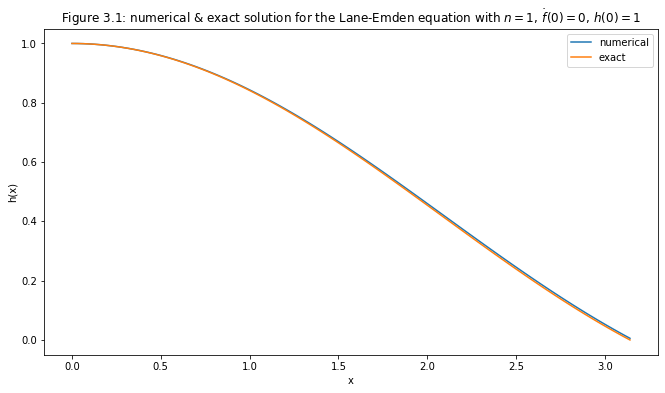

In [ ]:
# plotting the exact vs the numerical solution
plt.figure(figsize=(11,6))
plt.plot(x, h, label="numerical") # numerical solution
plt.plot(x, np.sinc(x/np.pi), label="exact") #exact solution

plt.title(r'Figure 3.1: numerical & exact solution for the Lane-Emden equation with $n = 1$, $ {\dot f}(0)=0$, $h(0)=1$')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()

plt.show()

We can see in Figure 3.1 that the numerical solution seems to be extremely close to the exact solution, especially for $x < 1$. After that, the numerical approximation slowly diverges from the exact solution up to $\pi$. To see how the numerical solution extends, we can change the $x_{max} = 6\pi$ and plot. We will run RK4 with 1000 to get a better approximation. 

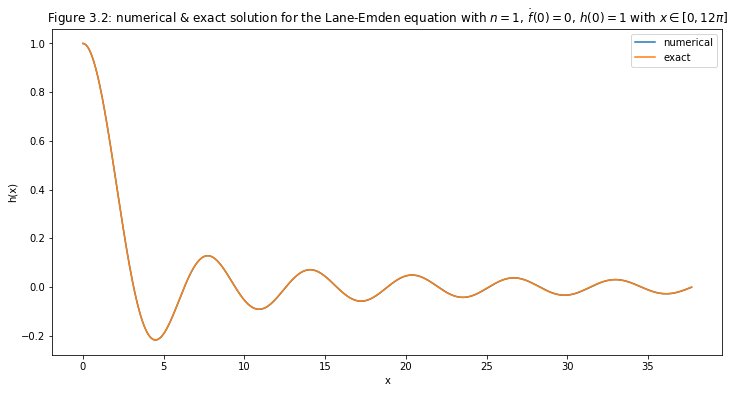

In [ ]:
# solving for x in [0, 12*pi], initial values h0 = 1, f0 = 0 and a 1000 steps
x, h, f = RK4_2D(0.0, 12*np.pi, 1.0, 0.0, 1000)

# plotting the exact vs the numerical solution
plt.figure(figsize=(12,6))
plt.plot(x, h, label="numerical") # numerical solution
plt.plot(x, np.sinc(x/np.pi), label="exact") #exact solution

plt.title(r'Figure 3.2: numerical & exact solution for the Lane-Emden equation with $n = 1$, $ {\dot f}(0)=0$, $h(0)=1$ with $x \in [0, 12\pi]$')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()

plt.show()

(d) We can then examine this behaviour quantitatively by computing and plotting the difference between both solutions

\begin{equation}
\delta h(x) = h_{numerical}(x) - h_{exact}(x)
\end{equation}

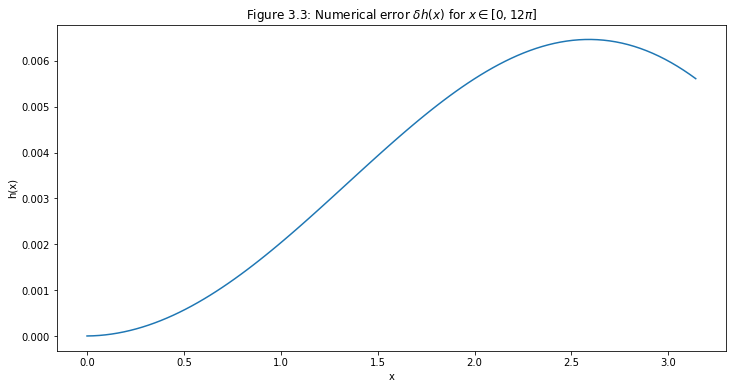

In [ ]:
exact_h = np.array(np.sinc(x/np.pi))
diff_h = h - exact_h

plt.figure(figsize=(12,6))
plt.plot(x, diff_h)
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title(r'Figure 3.3: Numerical error $\delta h(x)$ for $x \in [0, 12\pi]$')

plt.show()

As we could see qualitatively, the approximation error goes up between $0$ and approx. $2.5$ and goes down after that, passing through zero when $h(x)$ is at a minimum. The error then goes up again and starts reducing until reaching zero in the next maximum. This behaviour continues periodically, but with the absolute error slowly getting larger.

(e) Compute the $l_{2}$ and $l_{\infty}$ error norms:
    
$$
l_{2} = \sqrt{\sum_{i} \vert \delta h(x)_{i} \vert ^{2}}
$$

$$
l_{\infty} = max_{i} \vert \delta h(x)_{i} \vert
$$

where $\delta h_{i} = \delta h(x_{i})$ is the error at each grid-point.

In [ ]:
norm_2 = np.sqrt(np.sum(diff_h**2))
print(norm_2)

norm_inf = np.max(np.abs(diff_h))
print(norm_inf)

0.043964662971544194
0.006468014151785745


# Question 4. Fixed point iteration: matrix multiplication. 

(a) Show that $eq. 21$ satisfies $eq. 9$

\begin{equation}
h(x) = 1 + \int_{0}^{x} \left( \frac{y^2}{x} - y \right) h(y) dy
\end{equation}

We will use the Leibniz's integral rule for differentiation under the integral sign to check this equivalence. First for $h'(x)$

\begin{equation*}
h'(x) = 0 + \frac{d}{dx} \left[ \int_{0}^{x} \left( \frac{y^2}{x} - y \right) h(y) dy \right]
\end{equation*}

\begin{equation*}
\frac{d}{dx} \left[ \int_{0}^{x} \left( \frac{y^2}{x} - y \right) h(y) dy \right] =  \left( \frac{x^2}{x} - x \right) h(x) \frac{d}{dx} x - \left(  \frac{0}{x} - 0 \right) h(0) \frac{d}{dx} 0 + \int_{0}^{x} \frac{\partial}{\partial x} f (x, y) dy
\end{equation*}

The first two terms of that expression go to zero and we are left with

\begin{equation*}
\int_{0}^{x} \frac{\partial}{\partial x} \left[ \left( \frac{y^2}{x} - y \right) h(y) \right] dy  = \int_{0}^{x} \frac{\partial}{\partial x} \left[ \frac{y^2}{x}h(y) - y h(y) \right] dy \\
\end{equation*}

Once again, the second term goes to zero and we are left with

\begin{equation*}
h'(x) = \int_{0}^{x} \frac{\partial}{\partial x} \left[ \frac{y^2}{x}h(y) \right] dy
\end{equation*}

\begin{equation*}
h'(x) = - \int_{0}^{x} \left[ \frac{y^2}{x^2} h(y) \right] dy
\end{equation*}

We then derive the expression for $h''(x)$ using the same technique

\begin{equation*}
h''(x) = - \frac{x^2}{x^2}h(x)1 + \frac{0^2}{x^2}h(0)0 + \int_{0}^{x} \frac{\partial}{\partial x} \left[ - \frac{y^2}{x^2}h(y) \right] dy  
\end{equation*}

\begin{equation}
h''(x) = - h(x) + \int_{0}^{x} \left[ \frac{2y^2}{x^3}h(y) \right]  dy 
\end{equation}

We now have expressions for h(x), h'(x) and h''(x) in $eq. 21, 22, 23$. By rearranging $eq. 22$ we obtain the following 

$$
- h'(x)x^2 = \int_{0}^{x} y^2 h(y) dy
$$

By rearranging $eq. 23$ we obtain

$$
h''(x) = - h(x) + \frac{2}{x^3} \int_{0}^{x} y^2 h(y) dy 
$$

By plugging $eq. 23$ in $eq. 24$ we derive 

$$
h''(x) = - h(x) - \frac{2}{x^3} h'(x)x^2  
$$

which simplifies to

$$
h''(x) + h(x) + \frac{2}{x} - h'(x)  =  0
$$

which is the same as $eq. 9$

(b) Show that

\begin{equation*}
h(x) = 1 + \int_{0}^{x} \left( \frac{y^2}{x} - y \right) h(y) dy
\end{equation*}

is equivalent to 

$$
h(x) = 1 + \int_{0}^{R} \left( \frac{y^2}{max(x,y)} - y \right) h(y) dy
$$

If we assume $0 \leqslant x \leqslant R$ we can separate the integral in two 

\begin{equation*}
h(x) = 1 + \int_{0}^{x} \left( \frac{y^2}{x} - y \right) h(y) dy + \int_{x}^{R} \left( \frac{y^2}{y} - y \right) h(y) dy
\end{equation*}

The last term of this expression goes to zero, hence $eq. 21$ is equivalent to $eq. 27$.

c)We want to use the midpoint method to approximate the integral in
$$
h(x)=1+\int_{0}^{R}\left(\frac{y^{2}}{\max (x, y)}-y\right) h(y) d y
$$
so we build a grid for $x,y\in\left(  0,R\right)  $
\begin{align*}
x_{i}  &  =\Delta x\left(  i-\frac{1}{2}\right) \\
y_{j}  &  =\Delta x\left(  j-\frac{1}{2}\right)
\end{align*}
and we get
\begin{equation}
h(x)=\mathbf{1}+\Delta x\sum_{j=1}^{n}\left(  \frac{y_{j}^{2}}{\max
(x_{i},y_{j})}-y_{j}\right)  h(y_{j}).
\end{equation}
Defining
$$
M_{i j}=\Delta x\left(\frac{y_{j}^{2}}{\max \left(x_{i}, y_{j}\right)}-y_{j}\right) ; h_{i}=h\left(x_{i}\right)
$$
we can rewrite () as
\begin{equation}
h_{i}=\mathbf{1}+M_{ij}h_{j}%
\end{equation}
or solving for $h$
\begin{equation}
\left(  \delta_{ij}-M_{ij}\right)  h_{j}=\mathbf{1}\\
\end{equation}
which in matrix notation reads
\begin{equation}
\left(  I-M\right)  \mathbf{h}=\mathbf{1}.
\end{equation}
We can solve this system by an iterative method like the Jacobi method (cite).h Given a linear system
\begin{equation}
A\mathbf{x}=\mathbf{b}%
\end{equation}
we can split the matrix $A$ in a diagonal component $D$ and and a remander
component $R$, so that $A=D+R.$The solution in then obtained by iterating

\begin{equation}
\mathbf{x}^{(k+1)}=D^{-1}\left(  \mathbf{b}-R\mathbf{x}^{(k)}\right)
\end{equation}
This method converges when the spectral radius (the largest absolute value of
its eigenvalues) of the iterating matrix is less than one.
\begin{equation}
\rho\left(  D^{-1}R\right)  <1.
\end{equation}
In our case for the discretised Lane Emden equation, the relevant matrix is
$\left(  I-M\right)  ,$whose diagonal component is the identity matrix $I$ and
the remainder component is $M.$ It can be seen from its definition that the
matrix $M_{ij}$ is strictly lower triangular. This implies that the iterating
matrix (in our case $D^{-1}R=M$ ) is nilpotent and its spectral radius is then
zero, thus assuring convergece of the method.




In [ ]:
n = 100
delta_x = np.pi / n
x = np.linspace(0.5 * delta_x, (100 - 0.5) * delta_x  , n)

M = np.zeros((n, n))
#print(M)
h = np.ones(100)
#print(h)

In [ ]:
for i in range(len(x)):
    for j in range(len(x)):
        if i <= j:
            M[i, j] = 0
        else:
            M[i, j] = delta_x * ((x[j] ** 2 / x[i]) - x[j])      
#print(M)           

In [ ]:
tolerance = 10**(-14)
h_old = h
norm_2 = 1.0

while (norm_2 > tolerance):
    h_new = 1 + np.matmul(M, h_old.T)
    diff_h = h_new - h_old
    norm_2 = np.sqrt(np.sum(diff_h**2))
    h_old = h_new

print(h_old)

[1.         0.99967101 0.99901323 0.99802705 0.99671305 0.99507201
 0.9931049  0.99081289 0.98819732 0.98525976 0.98200192 0.97842575
 0.97453336 0.97032703 0.96580926 0.96098271 0.95585022 0.95041483
 0.94467973 0.9386483  0.93232408 0.92571079 0.91881232 0.9116327
 0.90417616 0.89644705 0.8884499  0.88018939 0.87167033 0.86289769
 0.85387658 0.84461225 0.83511008 0.8253756  0.81541442 0.80523233
 0.79483521 0.78422904 0.77341995 0.76241414 0.75121793 0.73983775
 0.72828009 0.71655156 0.70465884 0.69260869 0.68040795 0.66806353
 0.65558239 0.64297159 0.6302382  0.61738937 0.60443228 0.59137417
 0.57822231 0.56498399 0.55166653 0.53827728 0.52482361 0.51131289
 0.4977525  0.48414982 0.47051224 0.45684713 0.44316184 0.42946371
 0.41576007 0.4020582  0.38836537 0.37468879 0.36103563 0.34741304
 0.3338281  0.32028782 0.30679916 0.29336904 0.28000427 0.26671161
 0.25349773 0.24036924 0.22733263 0.21439432 0.20156064 0.1888378
 0.17623192 0.16374901 0.15139499 0.13917562 0.1270966  0.115163

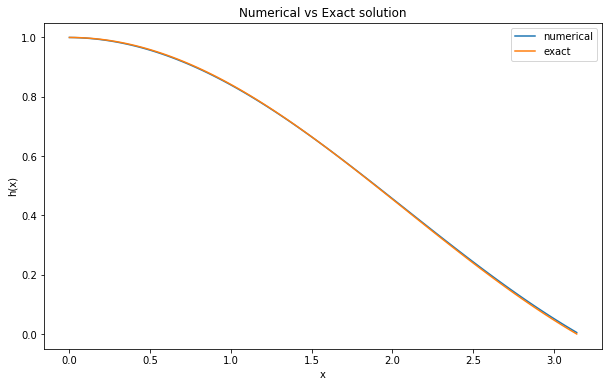

In [ ]:
x = np.linspace(0, np.pi, 100)

plt.figure(figsize=(10,6))
plt.plot(x, h_old, label="numerical") # numerical solution
plt.plot(x, np.sinc(x/np.pi), label="exact") #exact solution

plt.title('Numerical vs Exact solution')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()


plt.show()

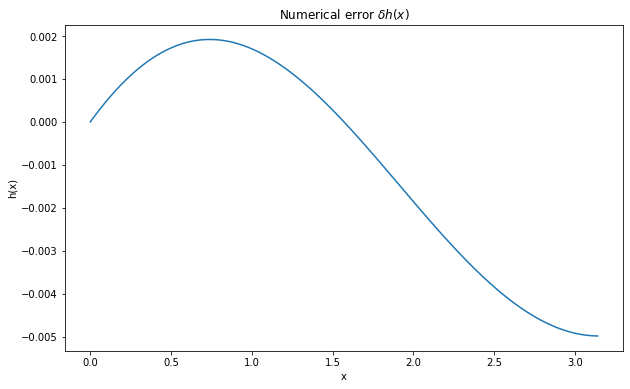

In [ ]:
h_exact = np.array(np.sinc(x/np.pi))
difference = h_exact - h_old

plt.figure(figsize=(10,6))
plt.plot(x, difference)
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title(r'Numerical error $\delta h(x)$')

plt.show()

In [ ]:
norm_2 = np.sqrt(np.sum(difference**2))
print(norm_2)

norm_inf = np.max(np.abs(difference))
print(norm_inf)

0.026217616513169395
0.0049837960947252844


# Question 5. Solving differential equations.

As we saw in Question 3, we can adequately approximate the exact solution for a system of first order differential equations using the Runge-Kutta algorithm. In this instance we will expand the 4th order Runge-Kutta algorithm, so as to tackle the Lorenz system.

Consider the Lorenz system

$$ \left \{
  \begin{aligned}
        & \frac{dx}{dt} = \sigma (y - x) \\
        & \frac{dy}{dt} = x (\rho - z) - y \\
        & \frac{dz}{dt} = xy - \beta z \\
  \end{aligned} 
  \right.
$$

with parameters $\sigma = 11$, $\beta = 3$ and $\rho = 27$.

This system, first described by Edward Lorenz in 1963, is a nonlinear system of 3 ordinary differential equations. Depending on parameters values for $\sigma$, $\beta$ and $\rho$ the behaviour of the system will differ radically, ranging from trajectories in equilibrium around a stable fixed point to unstable limit cycles or spiraling around strange attractors. Moreover, the trajectories will alternatively exhibit periodicity, noisy periodicity, transient chaos or chaos. Most notably, the system is famous for its chaotic trajectories around a strange attractor in many areas of its phase space. The parameters Lorenz initially focused on to study the dynamics of the chaotic trajectories are ($\sigma = 10$, $\beta = 8/3$, $\rho = 28$). We also know from literature [1] that there is a Hopf bifurcation in $\rho = 24.74$ for these parameters. Ultimately for $\rho \longmapsto \infty$ the trajectories settle down to periodic behaviour, but for values between $28 < \rho < 313$ there are small islands of periodic behaviour interspaced amongst chaotic trajectories.

For the purpose of this problem, at first glance it is not possible to ascertain that the Lorenz system will exhibit chaotic behaviour with the chosen parameters. We can qualitatively explore whether this is the case by plotting trajectories with close initial conditions and examining their behaviour over time.

(a) First, using initial conditions $x(0) = 5$, $y(0) = z(0) = 10$, we will evolve the system numerically using a 4th order Runge-Kutta method for the time interval $t \in [0, 3]$

In [ ]:
# constants
sigma = 11.0
beta = 3.0
rho = 27

# First order system of three nonlinear differential equations which define the Lorenz system
def dxdt(t, x, y, z):
    return sigma * (y - x)

def dydt(t, x, y, z): 
    return x * (rho - z) - y
    
def dzdt(t, x, y, z):
    return x * y - beta * z

# The following 4th order Runge-Kutta method implementation for 1st order ode systems of 3 equations 
# is an expansion of the code used in the Question 3 to 3 dimensions (x, y, z). The mechanics of it are the same as 
# in exercise 3. 
def RK4_3D(tmin, tmax, x0, y0, z0, n):
    "This Runge-Kutta method works for 1st order 3D ode systems"
    
    t = np.linspace(tmin, tmax, n) # n equally spaced points
    x = np.zeros(n) # initializing the vectors for keeping each computed value of x, y, z
    y = np.zeros(n)
    z = np.zeros(n)
    x[0] = x0 # initial value for the x, y, z vectors
    y[0] = y0
    z[0] = z0
    s = (tmax - tmin)/n # step size
    
    for i in range(0, n-1):
        # k1 is the value of the increment on the slope for each element of the vectors at beginning of interval s
        k1x = dxdt(t[i], x[i], y[i], z[i]) 
        k1y = dydt(t[i], x[i], y[i], z[i])
        k1z = dzdt(t[i], x[i], y[i], z[i]) # extra k for dimension z
        
        # k2 is the increment on the slope estimated using k1 and s at the midpoint of interval s
        k2x = dxdt(t[i] + 0.5 * s, x[i] + 0.5 * k1x * s, y[i] + 0.5 * k1y * s, z[i] + 0.5 * k1z * s)
        k2y = dydt(t[i] + 0.5 * s, x[i] + 0.5 * k1x * s, y[i] + 0.5 * k1y * s, z[i] + 0.5 * k1z * s)
        k2z = dzdt(t[i] + 0.5 * s, x[i] + 0.5 * k1x * s, y[i] + 0.5 * k1y * s, z[i] + 0.5 * k1z * s)
        
        # k3 is the increment on the slope estimated using k2 and s at the midpoint of interval s
        k3x = dxdt(t[i] + 0.5 * s, x[i] + 0.5 * k2x * s, y[i] + 0.5 * k2y * s, z[i] + 0.5 * k2z * s)
        k3y = dydt(t[i] + 0.5 * s, x[i] + 0.5 * k2x * s, y[i] + 0.5 * k2y * s, z[i] + 0.5 * k2z * s)
        k3z = dzdt(t[i] + 0.5 * s, x[i] + 0.5 * k2x * s, y[i] + 0.5 * k2y * s, z[i] + 0.5 * k2z * s)
        
        # k4 is the increment on the slope at the end of interval s
        k4x = dxdt(t[i] + s, x[i] + k3x * s, y[i] + k3y * s, z[i] + k3z * s)
        k4y = dydt(t[i] + s, x[i] + k3x * s, y[i] + k3y * s, z[i] + k3z * s)
        k4z = dzdt(t[i] + s, x[i] + k3x * s, y[i] + k3y * s, z[i] + k3z * s)
        
        # Each successive element is estimated by multiplying s to the weighted average of k1, 2k2, 2k3, k4
        # and adding it to the value of the previous element.
        x[i+1] = x[i] + s * (1.0 / 6.0) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i+1] = y[i] + s * (1.0 / 6.0) * (k1y + 2 * k2y + 2 * k3y + k4y)
        z[i+1] = z[i] + s * (1.0 / 6.0) * (k1z + 2 * k2z + 2 * k3z + k4z)
        
    return t, x, y, z


As a first exploratory analysis, let us display the values found for $x(t)$, $y(t)$, $z(t)$ for $t = 0, 1, 2, 3$.

In [ ]:
# x(0), y(0), z(0) is trivial 
t, x, y, z = RK4_3D(0, 0, 5, 10, 10, 10000)
x0, y0, z0 = x[-1], y[-1], z[-1]
print("The values of x(t), y(t), z(t) in t= 0 are", "x =", x0, ",", "y =", y0, ",", "z=", z0)

The values of x(t), y(t), z(t) in t= 0 are x = 5.0 , y = 10.0 , z= 10.0


In [ ]:
# x(1), y(1), z(1)
t, x, y, z = RK4_3D(0, 1, 5, 10, 10, 10000)
x1, y1, z1 = x[-1], y[-1], z[-1]
print("The values of x(t), y(t), z(t) in t= 1 are", "x =", x1, ",", "y =", y1, ",", "z=", z1)

The values of x(t), y(t), z(t) in t= 1 are x = -9.09553124480362 , y = -1.400981433054847 , z= 34.25886892225976


In [ ]:
# x(2), y(2), z(2)
t, x, y, z = RK4_3D(0, 2, 5, 10, 10, 10000)
x2, y2, z2 = x[-1], y[-1], z[-1]
print("The values of x(t), y(t), z(t) in t= 2 are", "x =", x2, ",", "y =", y2, ",", "z=", z2)

The values of x(t), y(t), z(t) in t= 2 are x = 0.7597722600519697 , y = 3.0381493792913905 , z= 22.081304337569385


In [ ]:
# x(3), y(3), z(3)
t, x, y, z = RK4_3D(0, 3, 5, 10, 10, 10000)
x3, y3, z3 = x[-1], y[-1], z[-1]
print("The values of x(t), y(t), z(t) in t= 3 are", "x =", x3, ",", "y =", y3, ",", "z=", z3)

The values of x(t), y(t), z(t) in t= 3 are x = 8.083525325774742 , y = 13.378290015371501 , z= 14.520311328289747


We can also plot the trajectory of the Lorenz system for the time interval $t \in [0, 3]$, for the given initial conditions to get a better feel for its behaviour (Figure 5.1). We get a first glimpse of the characteristic butterfly wing plot, whereby the trajectory goes back and forth drawing a spiral pattern around two singular points. This appears to be a strange attractor. 

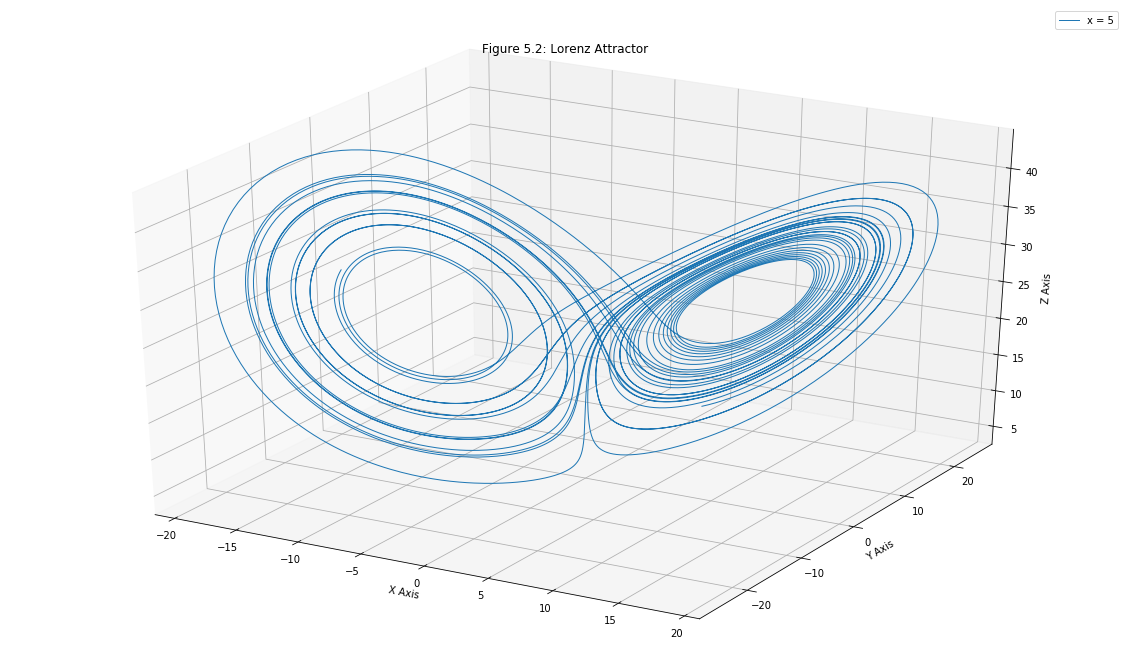

In [ ]:
# Longer temporal evolution for the system, so as to appreciate its structure better. 
t_30, x_30, y_30, z_30 = RK4_3D(0, 30, 5, 10, 10, 10000)

fig = plt.figure(figsize=(20,12))
ax = fig.gca(projection='3d')

ax.plot(x_30, y_30, z_30, lw=1, label="x = 5")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Figure 5.1: Lorenz Attractor")
plt.legend()

plt.show()

 Exponential divergence of nearby trajectories

(b) Now we will evolve the system numerically with new initial conditions: $x(0) = 5.001$, $y(0) = z(0) = 10$ and show the difference between $x(t)$, $y(t)$, $z(t)$ for the different initial conditions. 

In [ ]:
# input the new initial conditions to the RK algorithm -> perturbed system 
t_p, x_p, y_p, z_p = RK4_3D(0, 3, 5.001, 10, 10, 10000)

In [ ]:
# difference in x, y, z for the final state
diff_final = np.array([x_p[-1] - x[-1], y_p[-1] - y[-1], z_p[-1] - z[-1]])
print("This is the difference between the two initial conditions in x(t), y(t), z(t) for the final state:", diff_final)

This is the difference between the two initial conditions in x(t), y(t), z(t) for the final state: [0.00209787 0.00262967 0.00381504]


As we can see, despite the closeness in the initial conditions, there is a slight difference in the output values for the final state. However, by plotting the difference in values obtained for both initial conditions for each coordinate over time, we can better appreciate the difference in behaviour exhibited by the trajectories, as we observe the fluctuations in the differences over time (Figure 5.3). 

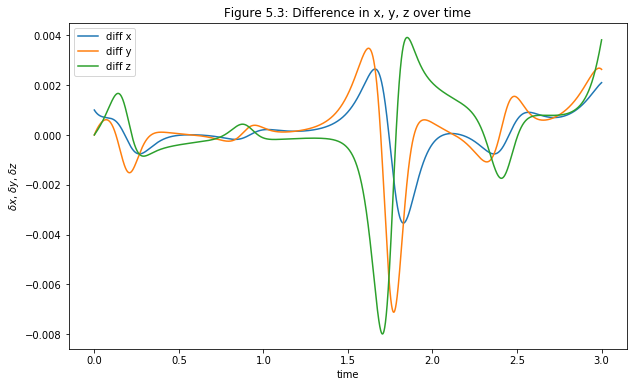

In [ ]:
# plot difference in all range for each coordinate between the two different initial conditions.
fig = plt.figure(figsize=(10,6))
plt.plot(t_p, x_p - x, label="diff x")
plt.plot(t_p, y_p - y, label="diff y")
plt.plot(t_p, z_p - z, label="diff z")
plt.xlabel('time')
plt.ylabel(r'$\delta x$, $\delta y$, $\delta z$')
plt.title('Figure 5.2: Difference in x, y, z over time')
plt.legend()

plt.show()

To better observe the divergence in behaviour in the trajectories, we can plot them together for the time interval $t \in [0, 10]$ (Figure 5.3). Very quickly we see how the initial condition $x = 5.001$ (in blue) diverges from $x = 5$ (in orange) jumping and spiralling from one side to the other of the attractor at different times. 

In [ ]:
# Longer temporal evolution for the first initial condition
t_t, x_t, y_t, z_t = RK4_3D(0, 10, 5, 10, 10, 10000)

In [ ]:
# pertubation of initial conditions & longer temporal evolution to see how the initial conditions diverge
t_tp, x_tp, y_tp, z_tp = RK4_3D(0, 10, 5.001, 10, 10, 10000)

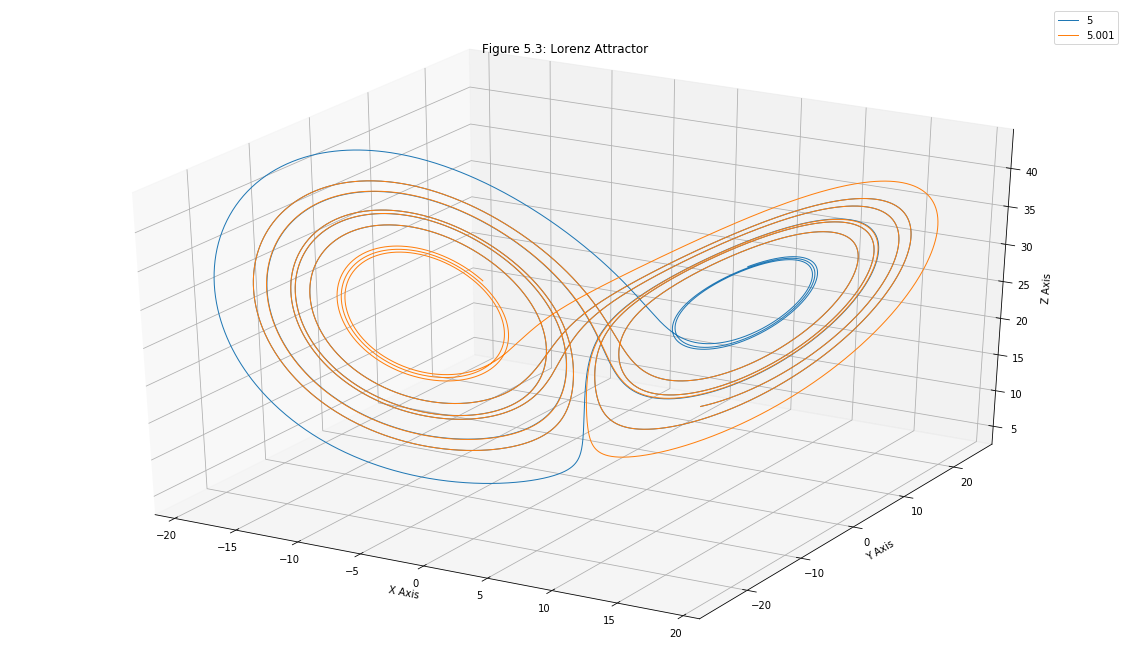

In [ ]:
# plot both conditions together to observe this phenomenon
fig = plt.figure(figsize=(20,12))
ax = fig.gca(projection='3d')

ax.plot(x_t, y_t, z_t, lw=1, label="5")
ax.plot(x_tp, y_tp, z_tp, lw=1, label="5.001")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Figure 5.3: Lorenz Attractor")
ax.legend()

plt.show()

This extreme sensitivity to initial conditions is a hallmark of chaotic systems. Furthermore, we can observe that the system  

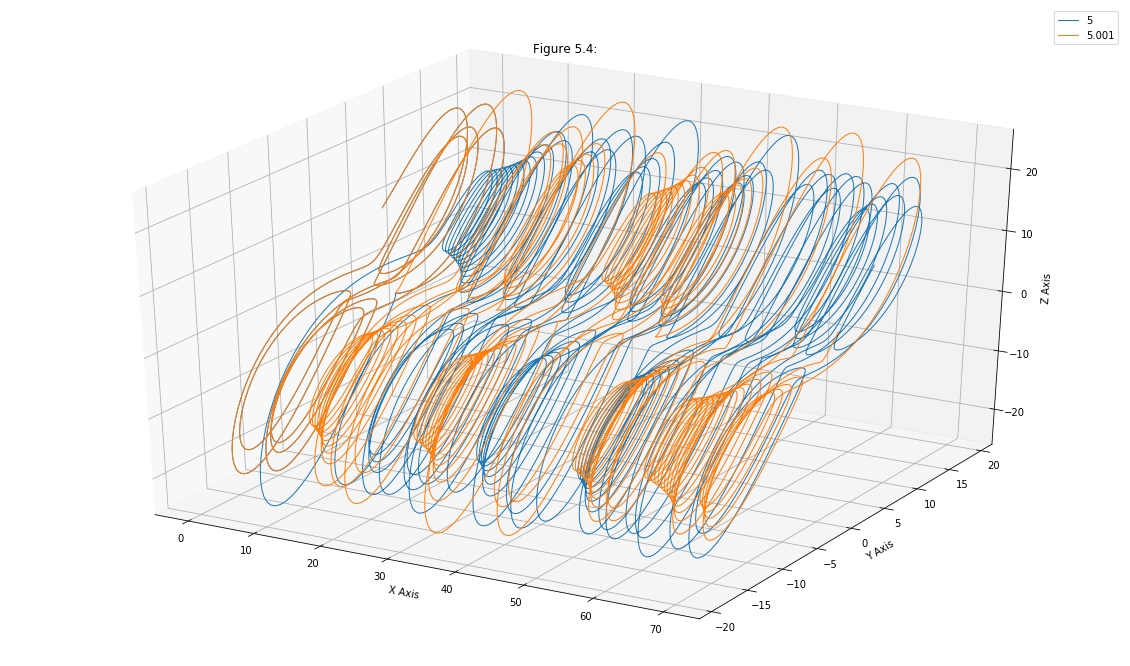

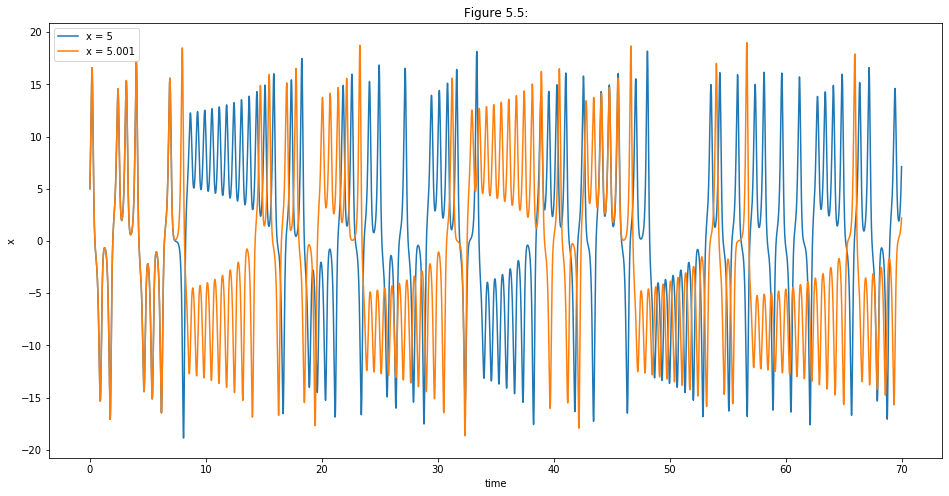

In [ ]:
t_t, x_t, y_t, z_t = RK4_3D(0, 70, 5, 10, 10, 10000)
t_tp, x_tp, y_tp, z_tp = RK4_3D(0, 70, 5.001, 10, 10, 10000)

# plot the xy trajectory over time
fig = plt.figure(figsize=(20,12))
ax = fig.gca(projection='3d')

ax.plot(t_t, x_t, y_t, lw=1, label="5")
ax.plot(t_tp, x_tp, y_tp, lw=1, label="5.001")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title('Figure 5.4:')
ax.legend()
plt.show()

# plot difference in all range for each coordinate between the two different initial conditions.
fig = plt.figure(figsize=(14,8))
plt.plot(t_t, x_t, label="x = 5")
plt.plot(t_tp, x_tp, label="x = 5.001")
plt.xlabel('time')
plt.ylabel('x')
plt.title('Figure 5.5:')
plt.legend()
#txt="Figure 5.5: We can also observe the diverging aperiodic oscillatory behaviour for both initial conditions over time. The trajectories do not seem to settle around a stable state"
#plt.figtext(0.5, 0.04, txt, wrap=True, horizontalalignment='center', fontsize=14)

plt.show()


Chaos, as defined by Strogatz, exhibits three definiting characteristics [1]:

1- Aperiodic long-term behaviour, which means that there are trajectories which do not settle down to fixed points, periodic or quasiperiodic orbits as $t \longmapsto \infty$

2- A deterministic system, meaning there are no stochastic or 'noisy' parameters and the observed behaviour stems from its nonlinearity. 

3- a sensitive dependence to initial conditions, whereby nearby trajectories diverge exponentially fast. 




We seem to be within a chaotic regime, as the behaviour is aperiodic and the trajectories do not end up dampening down towards equilibrium around a fixed point. 

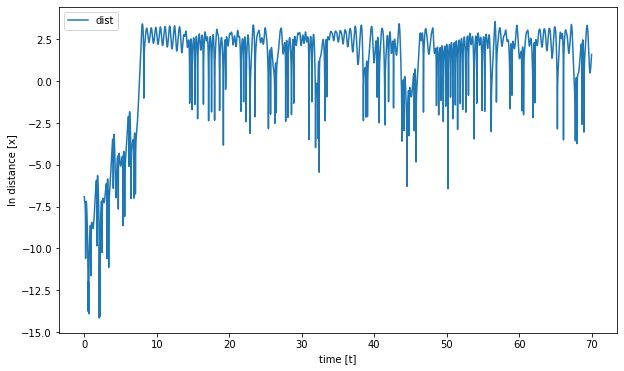

In [ ]:
# no se si hacer algo con este grafico. la pendiente lambda de la parte maso exponencial deberia ser 
# aprox 0.9 y se corresponde al exponente de Lyapunov. 


dist = x_tp - x_t
ln_dist = np.log(np.sqrt((dist ** 2)))


# plot the log of distance between the two different initial convergence to observe behaviour
fig = plt.figure(figsize=(10,6))
plt.plot(t_t, ln_dist, label="dist")
plt.xlabel('time [t]')
plt.ylabel('ln distance [x]')
plt.title('')
plt.legend()

plt.show()

# Question 6. Numerical integration.

(a) Trapezoidal rule

\begin{equation}
I = \int_{0}^{\infty} x \sin x \ dx
\end{equation}

using $n + 1$ equally spaced points in $x \in [0, \pi]$ for $n = 16, 32, 64, 128$.
Compare your numerical result to the exact value $I = \pi$.

In [ ]:
# n = 16

def f(x):
    return x * np.sin(x)

def trapezoidal_rule(f, xmin, xmax, n):
    x = np.linspace(0, np.pi, n+1)
    sum = 0.0
    dx = (xmax - xmin)/n
    for i in range(0, n):
        sum += f(x[i]) + f(x[i+1])
    return sum * dx/2
        


In [ ]:
tr_16 = trapezoidal_rule(f, 0, np.pi, 16)
tr_32 = trapezoidal_rule(f, 0, np.pi, 32)
tr_64 = trapezoidal_rule(f, 0, np.pi, 64)
tr_128 = trapezoidal_rule(f, 0, np.pi, 128)
tr_2000 = trapezoidal_rule(f, 0, np.pi, 2000)

print(tr_16, tr_32, tr_64, tr_128, tr_2000)
np.pi

print("The trapezoidal rule method used to compute the integral I converges towards the value of", np.pi," as the step size decreases.")

3.1314929732048298 3.1390689509032113 3.1409618039407654 3.141434945927927 3.141592007625672
The trapezoidal rule method used to compute the integral I converges towards the value of 3.141592653589793  as the step size decreases.


(b) Simpson's rule - Let $f$ be a function on $[a, b]$, choose an integer $n$, and sample $f$ at $2n + 1$ equally distributed points, $x_{0}$, $x_{1}$,..., $x_{2n}$, where $x_{0}$ = a and $x_{2n} = b$. Then Simpson's approximation to

\begin{equation}
I = \int_{a}^{b} \ dx
\end{equation}

in $n$ steps is as follows

\begin{equation}
\int_{a}^{b} f(x) \ dx \thickapprox \frac{b - a}{6}(f(a) + 4 f (\frac{a + b}{2}) + f(b))
\end{equation}

where $b \rightarrow x_{i}$ and $b \rightarrow x_{i+1}$

In [ ]:
def simpson_rule1(f, xmin, xmax, n):
    x = np.linspace(xmin, xmax, n+1)
    sum = 0.0
    dx = (xmax - xmin)/n
    for i in range(0, n):
        sum += f(x[i]) + f(x[i+1]) + 4 * f(0.5 * (x[i+1] + x[i]))
    return sum * dx/6

print(trapezoidal_rule(f, 0, np.pi, 128))
print(simpson_rule(f, 0, np.pi, 128))
np.pi

3.141434945927927
3.141592653985636


3.141592653589793

In [ ]:
sr_16 = simpson_rule(f, 0, np.pi, 16)
sr_32 = simpson_rule(f, 0, np.pi, 32)
sr_64 = simpson_rule(f, 0, np.pi, 64)
sr_128 = simpson_rule(f, 0, np.pi, 128)
sr_2000 = simpson_rule(f, 0, np.pi, 2000)
sr_3 = simpson_rule(f, 0, np.pi, 3)


print(sr_16, sr_32, sr_64, sr_128, sr_2000, sr_3)
np.pi

3.141594276802671 3.141592754953283 3.141592659923648 3.141592653985636 3.141592653589802 3.142948548758311


3.141592653589793

In [ ]:
def simpson_rule2(f, xmin, xmax, n):
    x = np.linspace(xmin, xmax, n+1)
    sum_even = 0.0
    sum_odd = 0.0
    dx = (xmax - xmin)/n
    for i in range(0, n):
        if (i % 2 == 0):
            sum_even += f(x[i])
        else:
            sum_odd += f(x[i])
    #print(x[n], "ultimo x")
    return (dx/3) * (f(x[0]) + 4 * sum_odd + 2 * sum_even + f(x[n]))

In [ ]:
sr2_12800 = simpson_rule2(f, 0, np.pi, 12800)
sr_12800 = simpson_rule(f, 0, np.pi, 12800)
print(sr_12800, sr2_12800)
np.pi

3.1415926535897856 3.1415926535897944


3.141592653589793

In [ ]:
# create a list of powers of two (2^n) to run the numerical integration methods 
powers_of_two = [2**i for i in range(1, 13)]
print(powers_of_two)

results_trapezoidal = []
results_simpson = []

for n in powers_of_two:
    
    num_error_trapezoidal = np.abs(np.pi - trapezoidal_rule(f, 0, np.pi, n))
    results_trapezoidal.append(num_error_trapezoidal)
    
    num_error_simpson = np.abs(np.pi - simpson_rule2(f, 0, np.pi, n))
    results_simpson.append(num_error_simpson)

print(results_trapezoidal, "/", results_simpson)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
[0.6741915533174532, 0.16317605354390352, 0.0404769050113174, 0.010099680384963339, 0.0025237026865818635, 0.0006308496490277093, 0.0001577076618661799, 3.942661858280516e-05, 9.856636092209214e-06, 2.4641578626471983e-06, 6.160393866139202e-07, 1.5400984265667716e-07] / [0.14827548010665925, 0.00716244638061303, 0.00042281116621101233, 2.6061157154977366e-05, 1.6232128787763145e-06, 1.0136348960188002e-07, 6.333856106266467e-09, 3.9584380218116166e-10, 2.4739765791537138e-11, 1.5445422718585178e-12, 9.769962616701378e-14, 4.440892098500626e-15]


(c) Numerical error

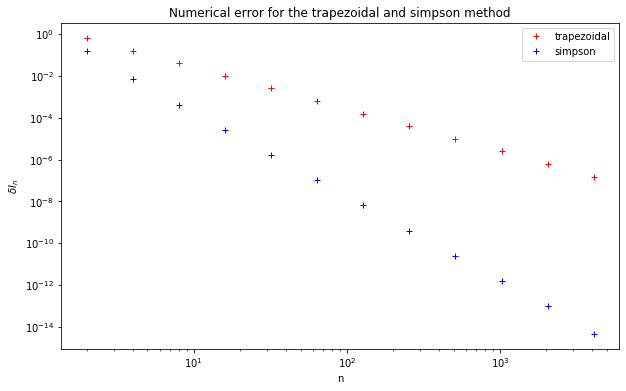

In [ ]:
# Log-log plot of the error 
plt.figure(figsize=(10,6))
plt.loglog(powers_of_two, results_trapezoidal,'+', color="red", label="trapezoidal")
plt.loglog(powers_of_two, results_simpson,'+', color="blue", label="simpson")
plt.xlabel("n")
plt.ylabel("$\delta I_{n}$")
plt.legend()
plt.title("Numerical error for the trapezoidal and simpson method")

plt.show()

(d)

In [ ]:
log_results_trapezoidal = np.log(np.array(results_trapezoidal))
log_results_simpson = np.log(np.array(results_simpson))

log_powers_of_two = np.log(np.array(powers_of_two)).reshape((-1, 1))

model1 = LinearRegression()
model2 = LinearRegression()

trapezoidal_lr = model1.fit(log_powers_of_two, log_results_trapezoidal)
simpson_lr = model2.fit(log_powers_of_two, log_results_simpson)

In [ ]:
model1.coef_, model2.coef_

(array([-2.00295422]), array([-4.03931696]))

\begin{equation}
I = \int_{a}^{b} \ dx
\end{equation}

in $n$ steps is as follows

$$
\int_{a}^{b} f(x) \ dx \thickapprox \frac{b - a}{6}(f(a) + 4 f (\frac{a + b}{2}) + f(b))
$$

where $b \rightarrow x_{i}$ and $b \rightarrow x_{i+1}$

# References


[1] https://stackoverflow.com/a/5579399/12378818

[2] Numerical Methods for Engineers and Scientists, 2nd edition

[3] Numerical Methods for Engineers and Scientists, 3rd edition

[4] Supriya Mukherjee1, Banamali Roy, Pratik Kumar Chaterjee, Solution of Lane-Emden Equation by Differential Transform Method

[5] Steven M LaValle, Planning algorithms, Copyright 2006, Cambridge University Press, 842 pages

[] Strogatz, Non-linear dynamics